# Musterlösung zu FIX_FIR_quant_ML.py # 

- Plotte idealen Frequenzgang und Frequenzgang mit quant. Koeffizienten
- Drucke quantisierte Koeffizienten und Quantisierungsfehler für Q(0.7) und Q(0.17)

 (c) 2016 Christian Münker - Files zur Vorlesung "DSV auf FPGAs"

In [3]:
from __future__ import print_function, division
import os, sys
import time
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [9, 6]

    b    |  bq(0.17)  | eps(0.17)|  bq(0.7)  | eps(0.7)  
 --------------------------------------------------------
 0.01623 |  0.0162277 |  2.28E-06|  0.015625 |  6.05E-04
 0.00000 |          0 |  0.00E+00|  0.000000 |  0.00E+00
-0.06871 | -0.0687103 |  3.27E-07| -0.070312 |  1.60E-03
 0.00000 |          0 |  0.00E+00|  0.000000 |  0.00E+00
 0.30399 |   0.303986 |  4.40E-06|  0.296875 |  7.11E-03
 0.50000 |        0.5 |  0.00E+00|  0.500000 |  0.00E+00
 0.30399 |   0.303986 |  4.40E-06|  0.296875 |  7.11E-03
 0.00000 |          0 |  0.00E+00|  0.000000 |  0.00E+00
-0.06871 | -0.0687103 |  3.27E-07| -0.070312 |  1.60E-03
 0.00000 |          0 |  0.00E+00|  0.000000 |  0.00E+00
 0.01623 |  0.0162277 |  2.28E-06|  0.015625 |  6.05E-04

LSB = 0.007812 (bq0.7) bzw. LSB = 7.629e-06 (bq0.17)


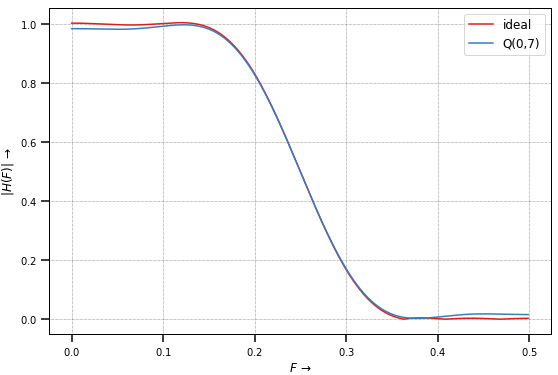

In [4]:
# %load FIX_FIR_quant_ML.py
b = [0.01623, 0, -0.06871, 0, 0.30399, 0.5, 0.30399, 0, -0.06871, 0, 0.01623]
#
q_obj7 = {'WI':0, 'WF': 7, 'quant':'floor', 'ovfl': 'none'}
q_obj17 = {'WI':0, 'WF': 17, 'quant':'floor', 'ovfl': 'none'}
#
Q_7 = fx.Fixed(q_obj7)
Q_17 = fx.Fixed(q_obj17)

bq7  = Q_7.fixp(b)  # quantize b with 7 ...
bq17 = Q_17.fixp(b) # ... and with 17 fractional bits
title_str = "    b    |  bq(0.17)  | eps(0.17)|  bq(0.7)  | eps(0.7) "
print(title_str, "\n","-"*len(title_str))
for i in range(len(b)):
    print("{0:8.5f} | {1:10.6g} | {2:9.2E}| {3:9.6f} | {4:9.2E}".format(b[i], bq17[i],
          b[i] - bq17[i], bq7[i], b[i] - bq7[i]))
print("\nLSB = {0:.4g} (bq0.7) bzw. LSB = {1:.4g} (bq0.17)".format(Q_7.LSB, Q_17.LSB))
w, H_id = sig.freqz(b) # complex ideal frequency response
w, H_q7 = sig.freqz(bq7)# complex frequency response with quantized coefficients
F = w / (2*np.pi) # normalized frequency
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(F, np.abs(H_id), label = "ideal")
ax.plot(F, np.abs(H_q7), label = "Q(0,7)")
ax.set_xlabel(r'$F\,\rightarrow$')
ax.set_ylabel(r'$|H(F)|\,\rightarrow$')
ax.legend()
plt.show()

***
**Copyright**

(c) 2016 - 2019 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2019*.